In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
species = pd.read_csv('species_info.csv')

In [93]:
observations = pd.read_csv('observations.csv')

In [94]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [95]:
del species['scientific_name']
del species['common_names']

In [96]:
print(species.head())

  category conservation_status
0   Mammal                 NaN
1   Mammal                 NaN
2   Mammal                 NaN
3   Mammal                 NaN
4   Mammal                 NaN


In [97]:
df = species[species['conservation_status'].notna()]

In [98]:
print(df.head(20))

    category conservation_status
7     Mammal  Species of Concern
8     Mammal          Endangered
9     Mammal          Endangered
29    Mammal  Species of Concern
30    Mammal  Species of Concern
33    Mammal  Species of Concern
34    Mammal          Endangered
35    Mammal  Species of Concern
36    Mammal  Species of Concern
37    Mammal  Species of Concern
38    Mammal          Threatened
39    Mammal          Endangered
72    Mammal          Endangered
91      Bird  Species of Concern
93      Bird  Species of Concern
94      Bird  Species of Concern
96      Bird  Species of Concern
98      Bird  Species of Concern
99      Bird  Species of Concern
100     Bird         In Recovery


In [99]:
df2 = df.groupby(['category','conservation_status'])['conservation_status'].count().reset_index(name="count")

In [100]:
print(df2)

             category conservation_status  count
0           Amphibian          Endangered      1
1           Amphibian  Species of Concern      4
2           Amphibian          Threatened      2
3                Bird          Endangered      4
4                Bird         In Recovery      3
5                Bird  Species of Concern     72
6                Fish          Endangered      3
7                Fish  Species of Concern      4
8                Fish          Threatened      4
9              Mammal          Endangered      7
10             Mammal         In Recovery      1
11             Mammal  Species of Concern     28
12             Mammal          Threatened      2
13  Nonvascular Plant  Species of Concern      5
14            Reptile  Species of Concern      5
15     Vascular Plant          Endangered      1
16     Vascular Plant  Species of Concern     43
17     Vascular Plant          Threatened      2


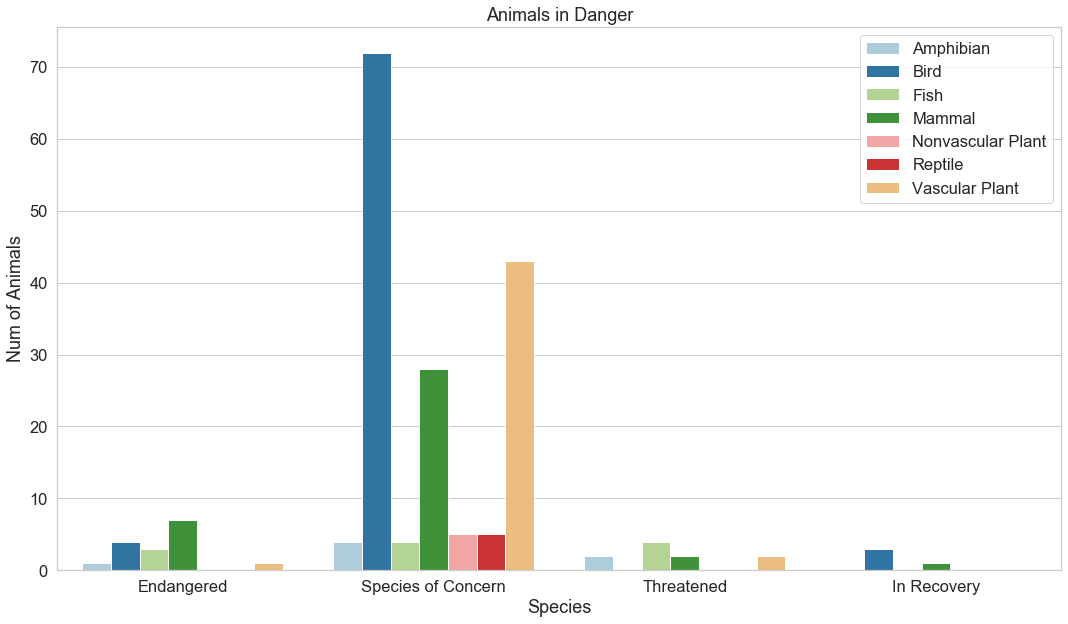

In [146]:
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.barplot(data=df2, x="conservation_status", y="count", hue="category")
plt.legend(loc='upper right')
ax.set_title('Animals in Danger')
sns.set_palette("Paired")
ax.set(xlabel='Species', ylabel='Num of Animals')
plt.show()